In [1]:
from pathlib import Path

import pyparsing as pp

mess_inp_file = Path("01_1-32_mess.inp")
spc_file = Path("species.csv")

In [2]:
from mess_io_proto import surface

surf = surface.from_mess(mess_inp_file, spc_inp=spc_file)
surf = surface.with_energies_relative_to(surf, 28)
surf = surface.without_fake_wells(surf)
# surface.display_network(surf)

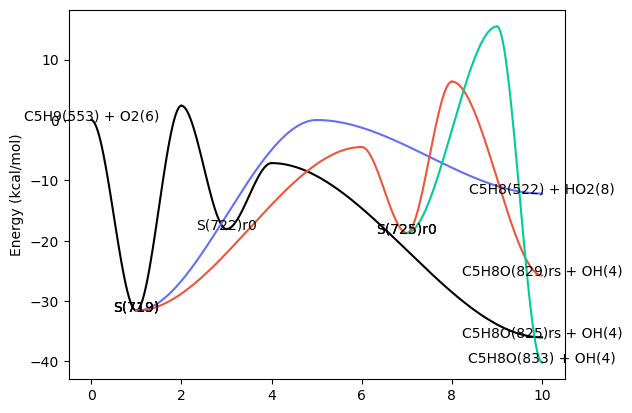

<Figure size 1000x500 with 0 Axes>

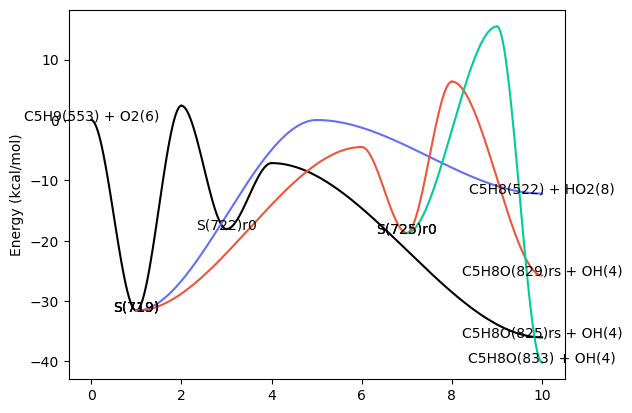

In [3]:
from matplotlib import pyplot

size = (10, 5)
fig = pyplot.figure(figsize=size)
fig = pyplot.figure()

surface.plot_connected_paths(
    surf, [[28, 0, 1, 22], [28, 0, 21], [28, 0, 3, 23], [28, 0, 3, 20]], fig=fig
)

In [4]:
path0 = surface.path_from_well_id_sequence(surf, [28, 0, 1, 22])
path1 = surface.path_from_well_id_sequence(surf, [28, 0, 21])
path1

[NMolWell(energy=0.0, fake=False, id=28, type='nmol', names=['C5H9(553)', 'O2(6)'], interacting=False),
 UnimolWell(energy=-31.6, fake=False, id=0, type='unimol', name='S(719)'),
 Barrier(energy=0.0, fake=False, well_ids=(0, 21), name='ts_1_15', barrierless=False),
 NMolWell(energy=-12.200000000000003, fake=False, id=21, type='nmol', names=['C5H8(522)', 'HO2(8)'], interacting=False)]

AttributeError: 'tuple' object has no attribute 'energy'

<Figure size 1000x500 with 0 Axes>

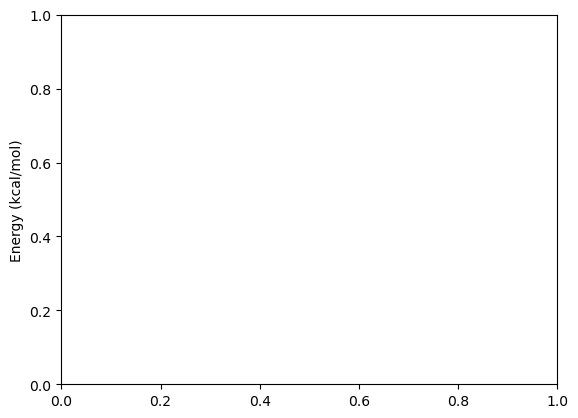

In [5]:
from importlib import reload

from matplotlib import pyplot

reload(surface)


size = (10, 5)
fig = pyplot.figure(figsize=size)
fig = pyplot.figure()

data0 = list(enumerate(path0))
data1 = list(enumerate(path1))
fig = surface.plot_path_data(data0, fig=fig, amchi_mapping=surf.amchi_mapping)
fig = surface.plot_path_data(
    data1, fig=fig, amchi_mapping=surf.amchi_mapping, color="red"
)